In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

# Load the dataset
file_path = './../data/price_elasticity_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check for null values
print(df.isnull().sum())

# Fill missing values if necessary
df.ffill()

# Convert price columns to float
df['Menu_Price'] = df['Menu_Price'].astype(float)
df['Pizza_Count'] = df['Pizza_Count'].astype(float)

print(df.dtypes)

       Product  Menu_Price  Pizza_Count  Profit_Percentage
0  Individuale      4.8200     6.583538          25.263382
1  Individuale      5.2500     6.763684          26.845586
2  Individuale      5.7500     6.690481          30.214454
3  Individuale      6.2275     6.138780          33.417930
4  Individuale      6.5500     5.977077          35.425975
Product              0
Menu_Price           0
Pizza_Count          0
Profit_Percentage    0
dtype: int64
Product               object
Menu_Price           float64
Pizza_Count          float64
Profit_Percentage    float64
dtype: object


/tmp/ipykernel_415424/1840088531.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [2]:
# Separate the data for each product
individuale_data = df[df['Product'] == 'Individuale']
communita_data = df[df['Product'] == 'Communita']

# Function to build and summarize linear regression model
def build_regression_model(data, price_column, sales_column):
    X = data[price_column]
    y = data[sales_column]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

In [3]:
# Build and summarize the model for Individuale
model_individuale = build_regression_model(individuale_data, 'Menu_Price', 'Pizza_Count')

                            OLS Regression Results                            
Dep. Variable:            Pizza_Count   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           8.21e-16
Time:                        00:37:50   Log-Likelihood:                -3.0430
No. Observations:                  71   AIC:                             10.09
Df Residuals:                      69   BIC:                             14.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6425      0.147     45.114      0.0

In [4]:
# Build and summarize the model for Communita
model_communita = build_regression_model(communita_data, 'Menu_Price', 'Pizza_Count')

                            OLS Regression Results                            
Dep. Variable:            Pizza_Count   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           2.29e-23
Time:                        00:37:50   Log-Likelihood:                 128.89
No. Observations:                  85   AIC:                            -253.8
Df Residuals:                      83   BIC:                            -248.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7463      0.032    118.686      0.0

In [5]:
# Function to calculate price elasticity
def calculate_price_elasticity(model, price_mean, quantity_mean):
    slope = model.params['Menu_Price']
    price_elasticity = slope * (price_mean / quantity_mean)
    return price_elasticity

# Calculate price elasticity for Individuale
price_mean_individuale = individuale_data['Menu_Price'].mean()
quantity_mean_individuale = individuale_data['Pizza_Count'].mean()
elasticity_individuale = calculate_price_elasticity(model_individuale, price_mean_individuale, quantity_mean_individuale)

# Calculate price elasticity for Communita
price_mean_communita = communita_data['Menu_Price'].mean()
quantity_mean_communita = communita_data['Pizza_Count'].mean()
elasticity_communita = calculate_price_elasticity(model_communita, price_mean_communita, quantity_mean_communita)

print(f'Price Elasticity for Individuale: {elasticity_individuale:.2f}')
print(f'Price Elasticity for Communita: {elasticity_communita:.2f}')


Price Elasticity for Individuale: -0.29
Price Elasticity for Communita: -0.13


In [6]:
# Function to plot the relationship between price and sales
def plot_price_vs_sales(data, price_column, sales_column, title):
    sns.set()
    plt.figure(figsize=(8, 6))
    plt.scatter(data[price_column], data[sales_column], s=10, c='gray')
    plt.xlabel('Price', fontsize=15)
    plt.ylabel('Sales', fontsize=15)
    plt.title(title, fontsize=20)
    plt.show()

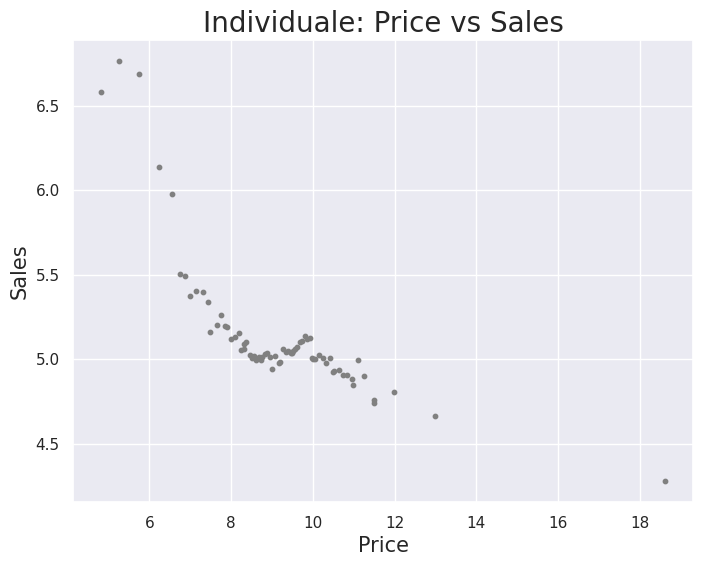

In [7]:
# Plot the relationship for Individuale
plot_price_vs_sales(individuale_data, 'Menu_Price', 'Pizza_Count', 'Individuale: Price vs Sales')

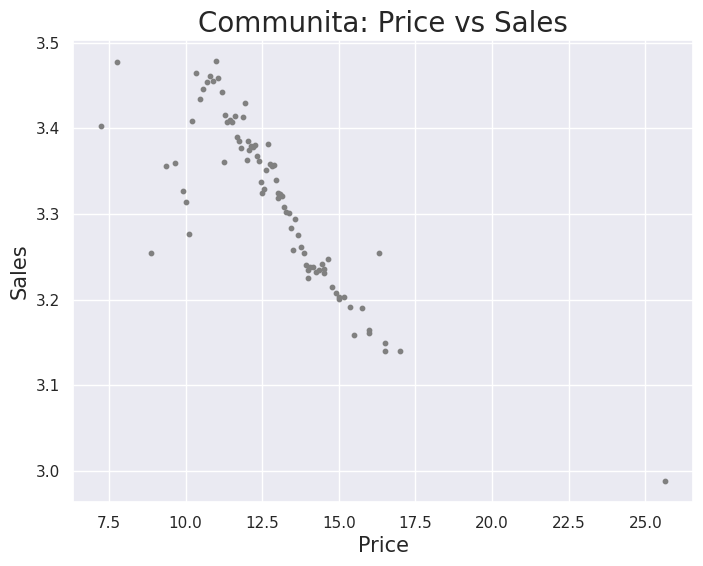

In [8]:
# Plot the relationship for Communita
plot_price_vs_sales(communita_data, 'Menu_Price', 'Pizza_Count', 'Communita: Price vs Sales')

In [ ]:
# Function to plot the total gross profit curve using sympy
# SymPy symbols
price = sp.symbols('price')
base_sales, elasticity, cost = sp.symbols('base_sales elasticity cost')

In [ ]:
# Define the total gross profit equation
quantity = base_sales * (price / base_sales) ** elasticity
total_gross_profit = quantity * (price - cost)

In [ ]:
# Differentiate the total gross profit equation with respect to price
d_total_gross_profit = sp.diff(total_gross_profit, price)

In [ ]:
# Function to find the optimal price using sympy
def find_optimal_price(base_sales_value, elasticity_value, cost_value):
    optimal_price_expr = sp.solve(d_total_gross_profit.subs({base_sales: base_sales_value, elasticity: elasticity_value, cost: cost_value}), price)
    return float(optimal_price_expr[0])

In [ ]:
# Calculate base sales and price for both products
base_price_individuale = individuale_data['Menu_Price'].mean()
base_sales_individuale = individuale_data['Pizza_Count'].mean()
base_price_communita = communita_data['Menu_Price'].mean()
base_sales_communita = communita_data['Pizza_Count'].mean()

In [ ]:
# Assuming costs for the products (you can adjust these values)
cost_individuale = base_price_individuale * (1 - individuale_data['Profit_Percentage'].mean() / 100)
cost_communita = base_price_communita * (1 - communita_data['Profit_Percentage'].mean() / 100)

In [ ]:
# Find the optimal price for both products using sympy
optimal_price_individuale = find_optimal_price(base_sales_individuale, elasticity_individuale, cost_individuale)
optimal_price_communita = find_optimal_price(base_sales_communita, elasticity_communita, cost_communita)

In [ ]:
print(f'Optimal Price for Individuale: {optimal_price_individuale:.2f}')

In [ ]:
print(f'Optimal Price for Communita: {optimal_price_communita:.2f}')

In [ ]:
# Function to plot the total gross profit curve
def plot_gross_profit_curve(base_sales_value, elasticity_value, cost_value, base_price_value, product_name):
    prices = np.linspace(0.5 * base_price_value, 1.5 * base_price_value, 100)
    gross_profits = [total_gross_profit.subs({price: p, base_sales: base_sales_value, elasticity: elasticity_value, cost: cost_value}).evalf() for p in prices]
    
    plt.figure(figsize=(8, 6))
    plt.plot(prices, gross_profits, label='Total Gross Profit Curve')
    optimal_price = prices[np.argmax(gross_profits)]
    plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')
    plt.title(f'Total Gross Profit Curve for {product_name}')
    plt.xlabel('Price')
    plt.ylabel('Total Gross Profit')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Plot the total gross profit curve for both products
plot_gross_profit_curve(base_sales_individuale, elasticity_individuale, cost_individuale, base_price_individuale, 'Individuale')
plot_gross_profit_curve(base_sales_communita, elasticity_communita, cost_communita, base_price_communita, 'Communita')